### Module 1 Assignment 1: House Prices: Advanced Regression Techniques EDA (Kaggle)
- **Submitted By**: **Pratyush Choudhary**
- **Date** :**25/06/2023**

### Background
This week, you are to become familiar with Kaggle.com and use the [House Prices Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle competition to hone your Exploratory Data Analysis (EDA) skills. The dependent variable of interest is house prices in Ames, Iowa (‘SalePrice’). 


### Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care? 

**This question is significant because it helps individuals and organizations involved in the real estate market make informed decisions and understand the value of a property.**

**Here's why different stakeholders should care about this question:**

- **Homeowners:** Homeowners are interested in understanding how specific features and factors can impact the value of their homes. This knowledge allows them to make informed decisions about renovations, pricing, and future investments in order to maximize the value of their properties.

- **Real Estate Agents:** Real estate agents can provide better service to their clients by having knowledge about the factors that influence house prices. This allows them to give accurate pricing recommendations and insights, helping their clients make informed decisions about buying or selling a home.

- **Property Developers:** Property developers need to understand the relationship between housing features and sale prices in order to make strategic decisions about property design, amenities, and target markets. This knowledge helps them create successful and desirable developments that meet market demand.

- **Policy Makers:** Policy makers can use housing market data to analyze the demand for specific types of housing and identify areas that require revitalization or infrastructure development. By formulating effective policies based on this information, they can address housing needs and ensure a well-functioning housing market.

In short we can say that  understanding the factors that influence housing prices is crucial for various stakeholders as it enables them to make better decisions related to buying, selling, developing, and regulating housing.

### Requirements
You are to conduct EDA on the dataset as follows. 

1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
2. Investigate missing data and outliers.
3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [17]:
#load required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

### Load Data and get an overview of dataset
- In this week Assignment we are focussing only on train dataset available by external link .

In [3]:
df_train=pd.read_csv('train.csv')
df_train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df_train.shape

(1460, 81)

###  Observation1:-
**Train** data has 1460 rows and 81 columns.

In [5]:
from IPython.display import display

# Assuming your DataFrame is named 'df'
display(df_train)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [6]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

#### Variable Analysis

In [7]:
#Dropping Id & SalePrice
data = df_train.drop(['Id', 'SalePrice'], axis=1)

In [8]:
# Selecting columns with object (string) data type as categorical variables
category_var = data.select_dtypes(include='object')

# Selecting columns excluding the object (string) data type as numerical variables
num_var = data.select_dtypes(exclude='object')

# Printing the number of categorical features in the dataset
print("Number of categorical features are: ", category_var.shape[1])

# Printing the number of numerical features in the dataset
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  43
Number of numerical features are:  36


#### Observations2: 
- The train dataset of house prices contains 43 categorical features and 36 numerical features. These features are likely to have an impact on the target variable, which is 'SalePrice'.

- The 'Id' column has been dropped from the dataset as it does not provide any meaningful information for predicting the 'SalePrice'.

- Additionally, the 'SalePrice' column has been dropped as it serves as the target variable, which we are trying to predict in our analysis. Removing the target variable from the dataset allows us to focus on examining the relationships and patterns between the remaining independent variables and the target variable.

- By dropping these columns, we can streamline the dataset for further analysis and modeling, focusing on the relevant features that can potentially influence the 'SalePrice' of houses.

In [9]:
# Get the overall concise summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

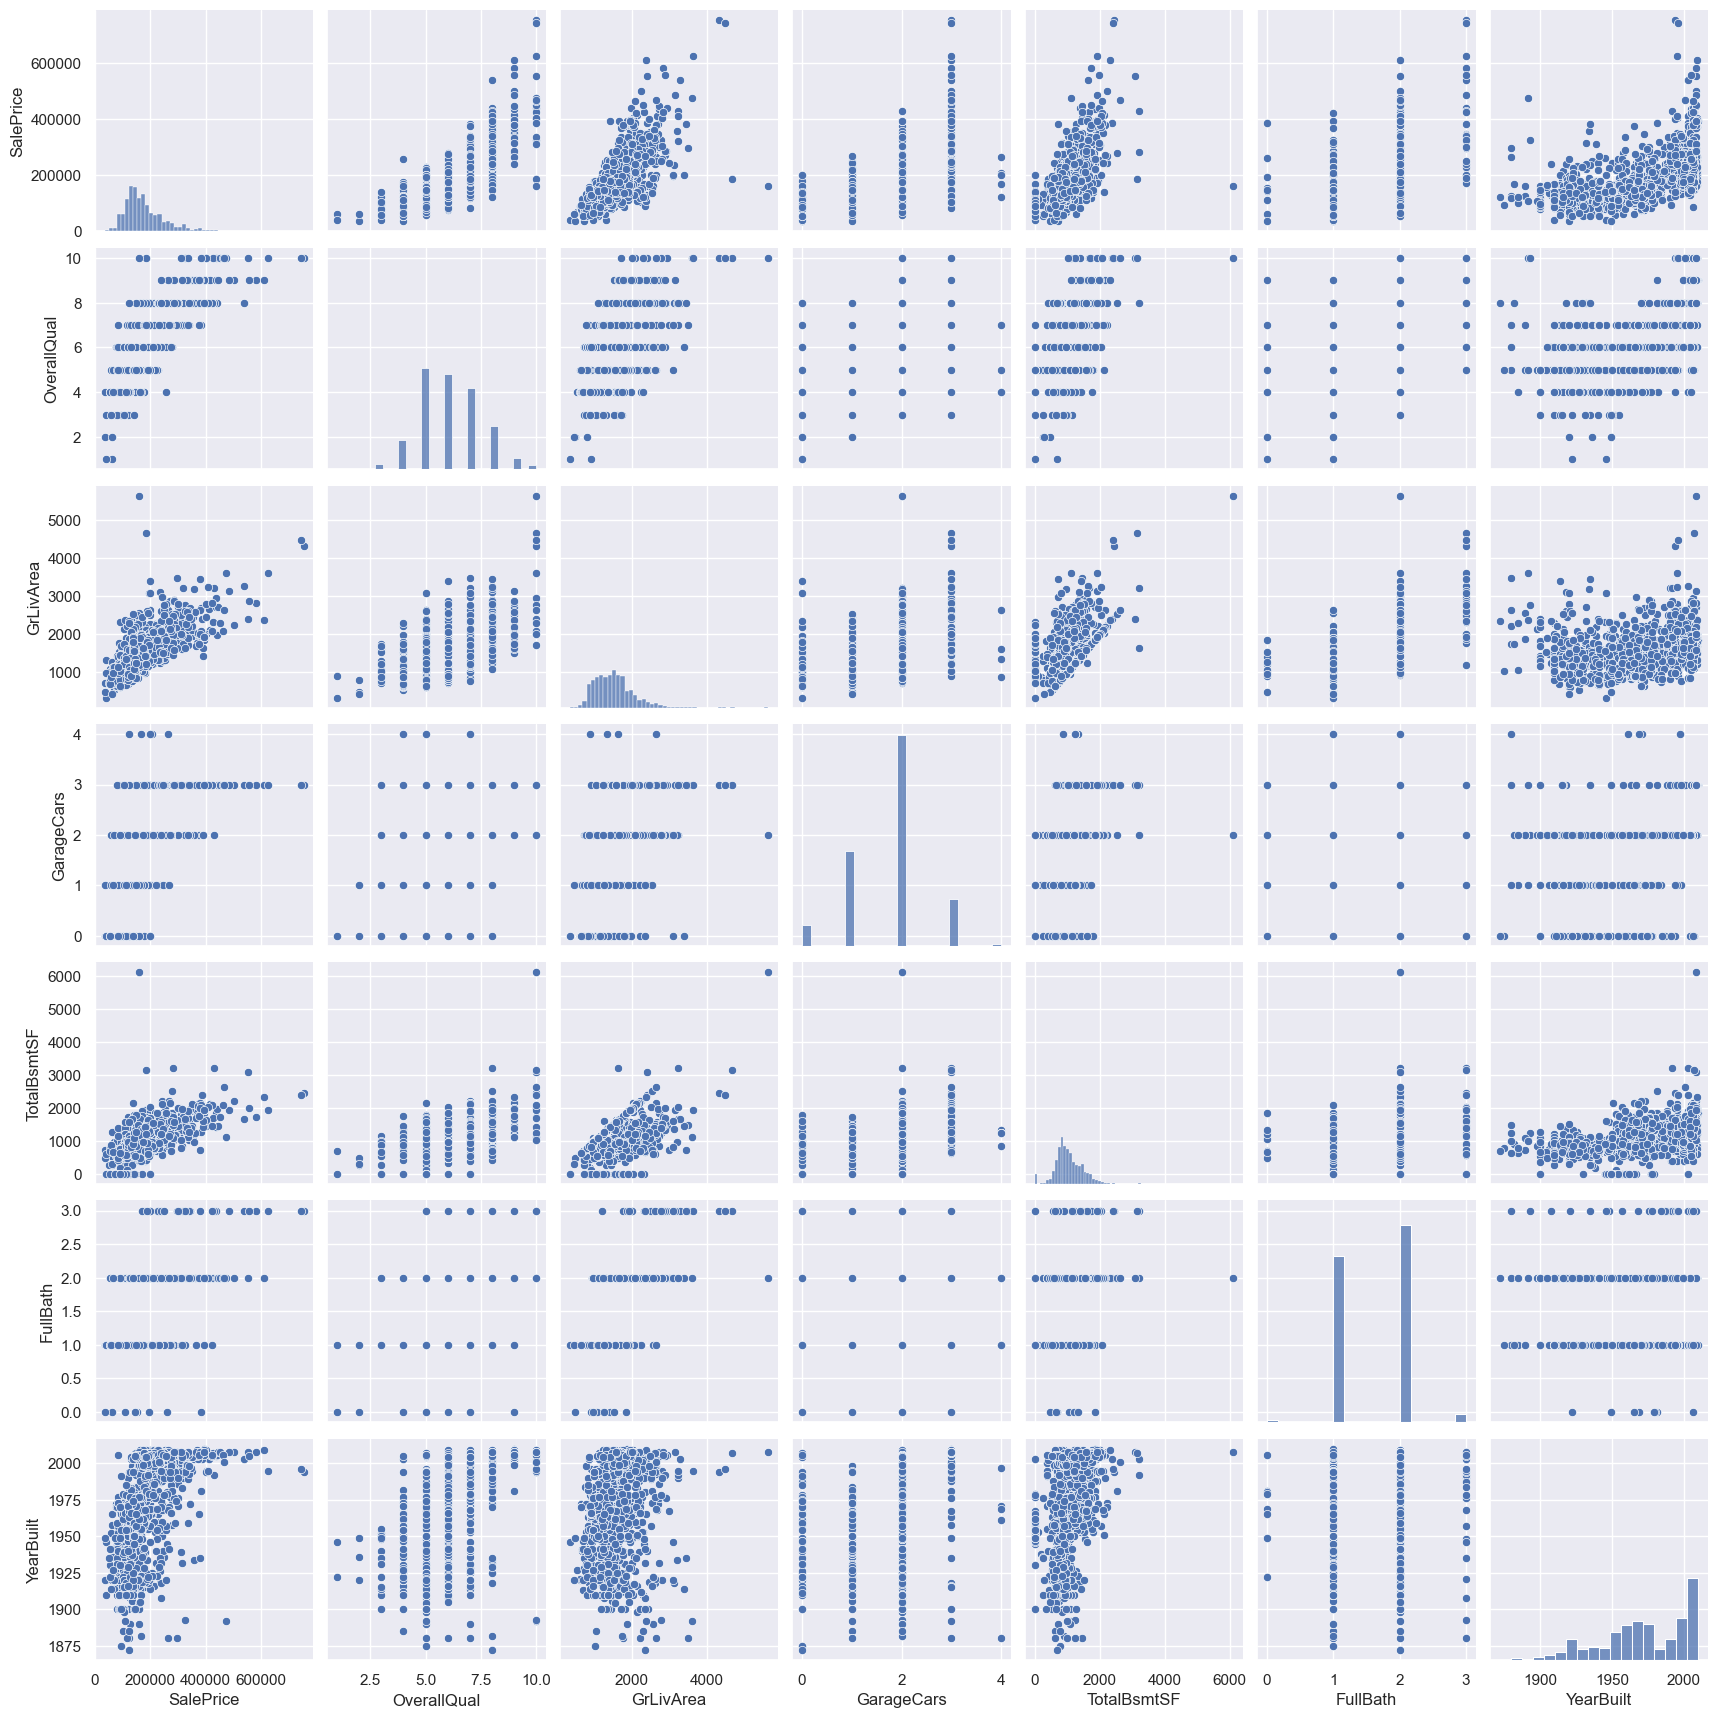

In [10]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

### Section1:- 
**Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.**

**Brief Overview**
The dependent variable in the House Prices Advanced Regression Techniques dataset represents the target variable that we want to predict or explain. In this case, the dependent variable is the **"SalePrice"** column, which represents the sale prices of houses.

To understand the marginal distribution of the dependent variable, we can calculate descriptive statistics and create visualizations.

In [11]:
#Descriptive Statistics:


# Calculate descriptive statistics for the dependent variable
statistics = df_train["SalePrice"].describe()

# Print the statistics
print(statistics)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Brief Explanation:**

The above statistics provide a summary of the distribution of sale prices in the dataset, giving insights into the range, central tendency, and variability of the dependent variable.

**count:** This indicates the number of non-null values in the "SalePrice" column. In this case, there are 1460 non-null entries.
**mean:** It represents the average value of the "SalePrice" column, which is approximately $180,921.195890. This value gives an overall idea of the typical price of the houses in the dataset.

**std:** The standard deviation measures the dispersion or variability of the data points from the mean. In this case, the standard deviation of the "SalePrice" column is approximately $79,442.502883. A higher standard deviation indicates a wider range of prices in the dataset.

**min:** This represents the minimum value in the "SalePrice" column, which is $34,900. It shows the lowest observed price in the dataset.

**25%:** The 25th percentile, also known as the first quartile, indicates the value below which 25% of the data points fall. In this case, 25% of the houses have a sale price less than or equal to $129,975.

**50%:** The 50th percentile, also known as the median, represents the middle value of the dataset. In the "SalePrice" column, the median is USD 163,000.  This means that half of the houses have a sale price below $163,000 and the other half have a sale price above it.

**75%:** The 75th percentile, also known as the third quartile, indicates the value below which 75% of the data points fall. In this case, 75% of the houses have a sale price less than or equal to $214,000.

**max:** This represents the maximum value in the "SalePrice" column, which is $755,000. It shows the highest observed price in the dataset.

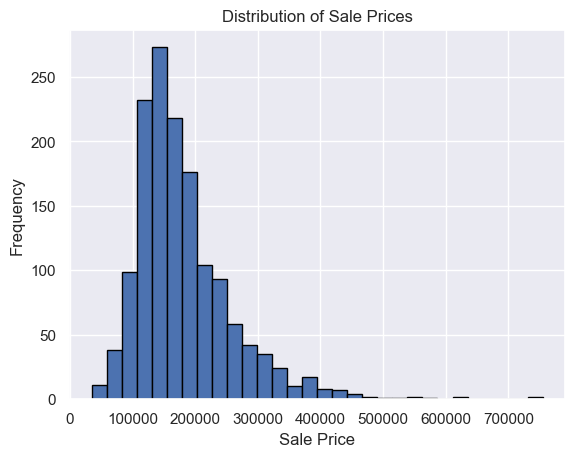

In [12]:
#Visualization:
data=df_train
# Create a histogram of the dependent variable
plt.hist(data["SalePrice"], bins=30, edgecolor="black")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Prices")
plt.show()


#### This code snippet creates a histogram to visualize the distribution of the dependent variable, "SalePrice". It bins the data into 30 intervals and displays the frequency of each bin.
- Above Bar plot confirms the statistics we have captured above for the target variable 'SalePrice '

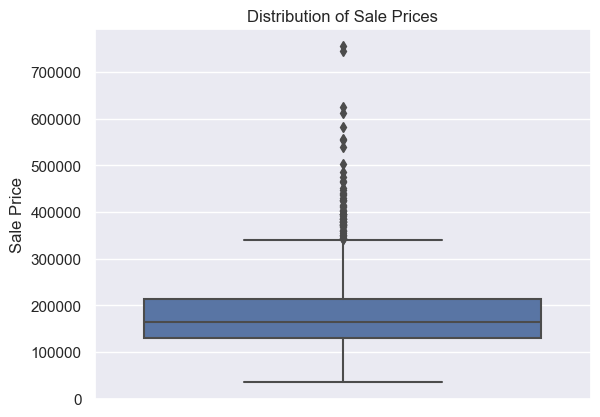

In [13]:
# Box Plot

# Create a box plot of the dependent variable
sns.boxplot(data=data, y="SalePrice")
plt.ylabel("Sale Price")
plt.title("Distribution of Sale Prices")
plt.show()


**A box plot provides a visual representation of the distribution of the dependent variable, showing the median, quartiles, and any potential outliers.**

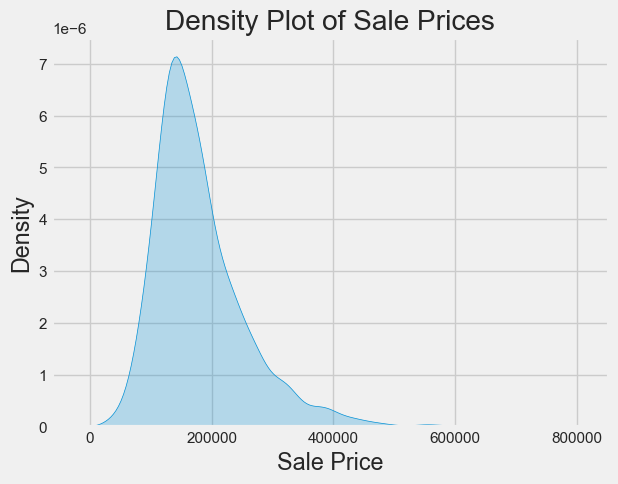

In [46]:
# Create a density plot of the dependent variable
sns.kdeplot(data=df_train, x="SalePrice", fill=True)
plt.xlabel("Sale Price")
plt.ylabel("Density")
plt.title("Density Plot of Sale Prices")
plt.show()


**A density plot displays the probability density function of the dependent variable, giving us a smooth estimate of the distribution's shape.**
**Observation:**  The dependent feature 'SalePrice' is right skewed

In [47]:
import scipy.stats as stats

saleprice = df_train['SalePrice']

# Calculate skewness and kurtosis
skewness = stats.skew(saleprice)
kurtosis = stats.kurtosis(saleprice)

# Print the results
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


The values of skewness and kurtosis provide information about the shape and characteristics of a distribution.

**Skewness:**
Skewness measures the asymmetry of the distribution. A skewness value of 1.88 (1.880940746034036) indicates a positive skewness. This means that the distribution of the SalePrice variable is skewed towards the right. In other words, the tail of the distribution is longer on the right side, indicating the presence of some high-value outliers or extreme values.

**Kurtosis:**
Kurtosis measures the peakedness or flatness of the distribution compared to a normal distribution. A kurtosis value of 6.51 (6.509812011089439) indicates positive excess kurtosis. This means that the distribution of the SalePrice variable is more peaked or has heavier tails compared to a normal distribution. The positive excess kurtosis suggests the presence of outliers or extreme values in the distribution, which can lead to a more concentrated or spiked shape.

**Let's summarize the visualization  and have a closer look on above observation by combining histogram, box-plot and probability plot together.**

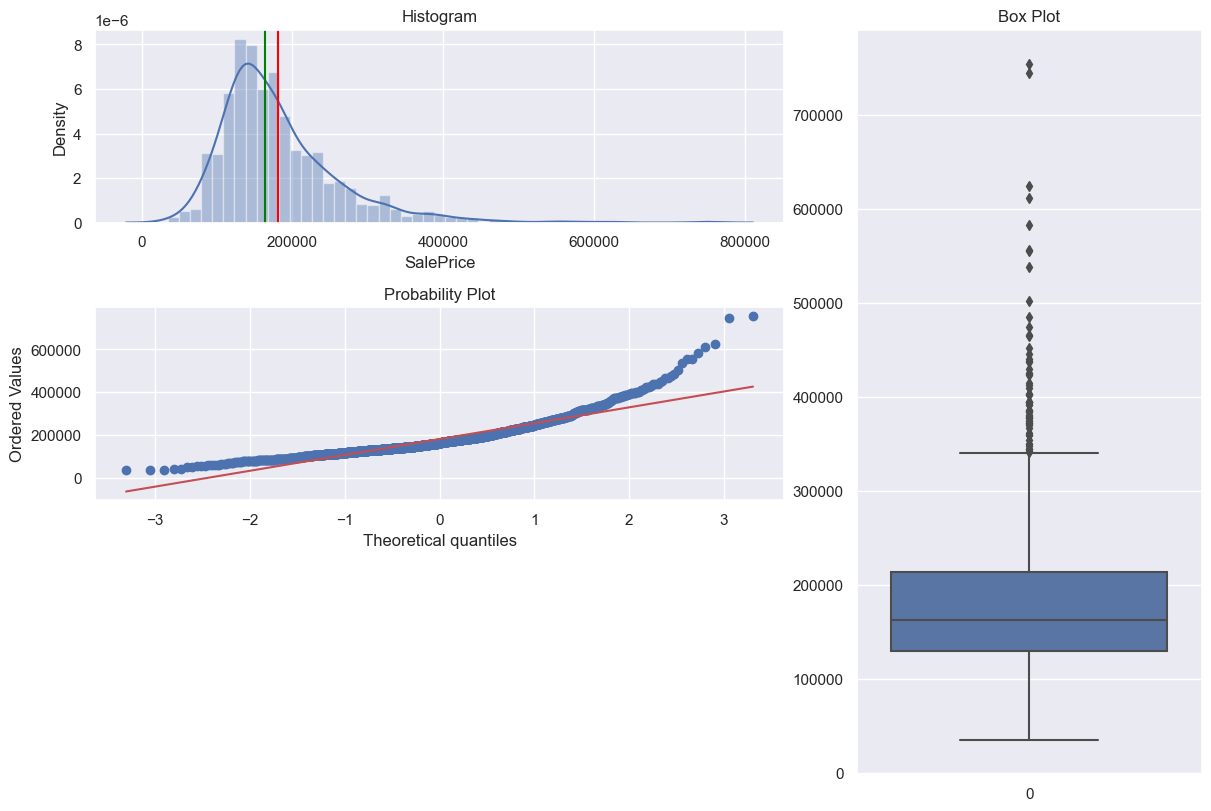

In [18]:
def summarize_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
summarize_chart_plot(df_train, 'SalePrice')

####  Summary based on above plot: 

- The histogram plot of the SalePrice reveals a non-normal distribution with a right skew. The presence of a longer tail on the right side indicates that there are relatively higher-priced houses in the dataset.

- The boxplot highlights the presence of outliers in the SalePrice variable. The points outside the whiskers indicate data points that deviate significantly from the majority of the observations.

- The probability plot provides a comparison between the expected distribution of SalePrice if it were normally distributed (represented by the red line) and the actual distribution (represented by the blue points). We can observe substantial deviations from normality at both ends of the plot, indicating a departure from a perfectly normal distribution.

### Section2:- 
#### Investigate missing data and outliers.



## Missing Data / Null Values Analysis

In [19]:
def null_values(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [20]:
null_frame_train = null_values(df_train)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values',ascending=False).head(10)

Columns  Count of Null Values  Approximate Percentage of Null Values
72        PoolQC                  1453                              99.520548
74   MiscFeature                  1406                              96.301370
6          Alley                  1369                              93.767123
73         Fence                  1179                              80.753425
57   FireplaceQu                   690                              47.260274
3    LotFrontage                   259                              17.739726
59   GarageYrBlt                    81                               5.547945
64    GarageCond                    81                               5.547945
58    GarageType                    81                               5.547945
60  GarageFinish                    81                               5.547945

In [21]:
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values',ascending=False).tail(10)

Columns  Count of Null Values  Approximate Percentage of Null Values
37    BsmtUnfSF                     0                                    0.0
34   BsmtFinSF1                     0                                    0.0
21    RoofStyle                     0                                    0.0
29   Foundation                     0                                    0.0
28    ExterCond                     0                                    0.0
27    ExterQual                     0                                    0.0
24  Exterior2nd                     0                                    0.0
23  Exterior1st                     0                                    0.0
22     RoofMatl                     0                                    0.0
80    SalePrice                     0                                    0.0

### Observation3:

- NA has a different meaning in this dataset. It is not necessarily indicative of missing data that needs to be imputed or removed.

- In several columns, such as 'Alley' and 'GarageType', the presence of NA actually represents a specific condition or feature of the house(whether present or not available as well). For example, NA in 'Alley' means the house has no alley access, and NA in 'GarageType' means the house has no garage. Similar patterns are observed in other columns as well.

- It is important to consider these NA values as they can have an impact on the final prices of the houses. Ignoring or removing these values could lead to biased or inaccurate predictions.

- One way to handle these NA values is to replace them appropriately with proper abbreviations or categories that reflect the corresponding columns. This ensures that the information about the absence of certain features is retained in the dataset.

- It is worth noting that the target variable 'SalePrice' does not have any null values, which means we have complete data for this variable.

In [22]:
def plot_missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

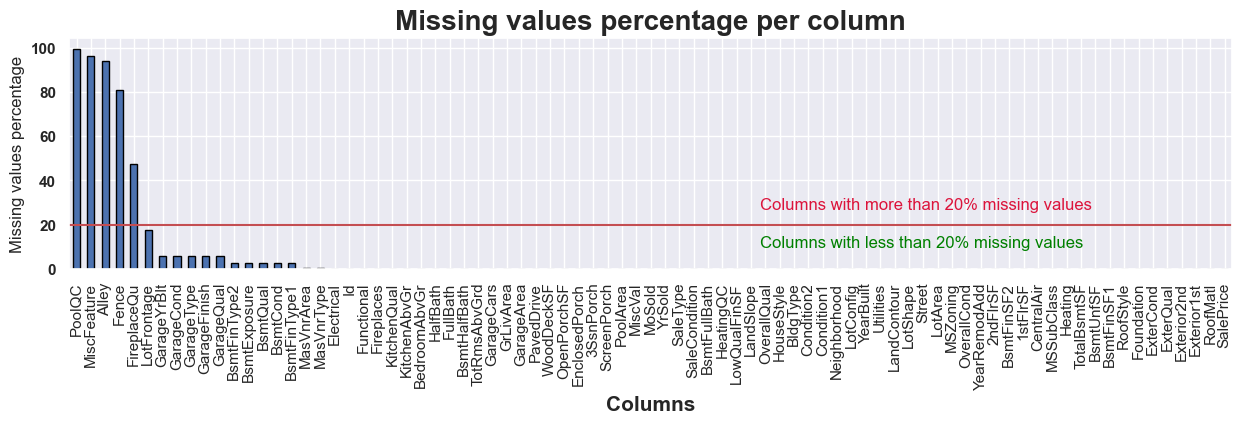

In [23]:
plot_missing_values(df_train, 20, color=sns.color_palette('Reds',15))

#### Observation4: 

- There are 5 features having more than 20 percent null values. We can deal with these values appropriately by either replacing,imputing or dropping the rows/columns.

**Outlier Analysis :**

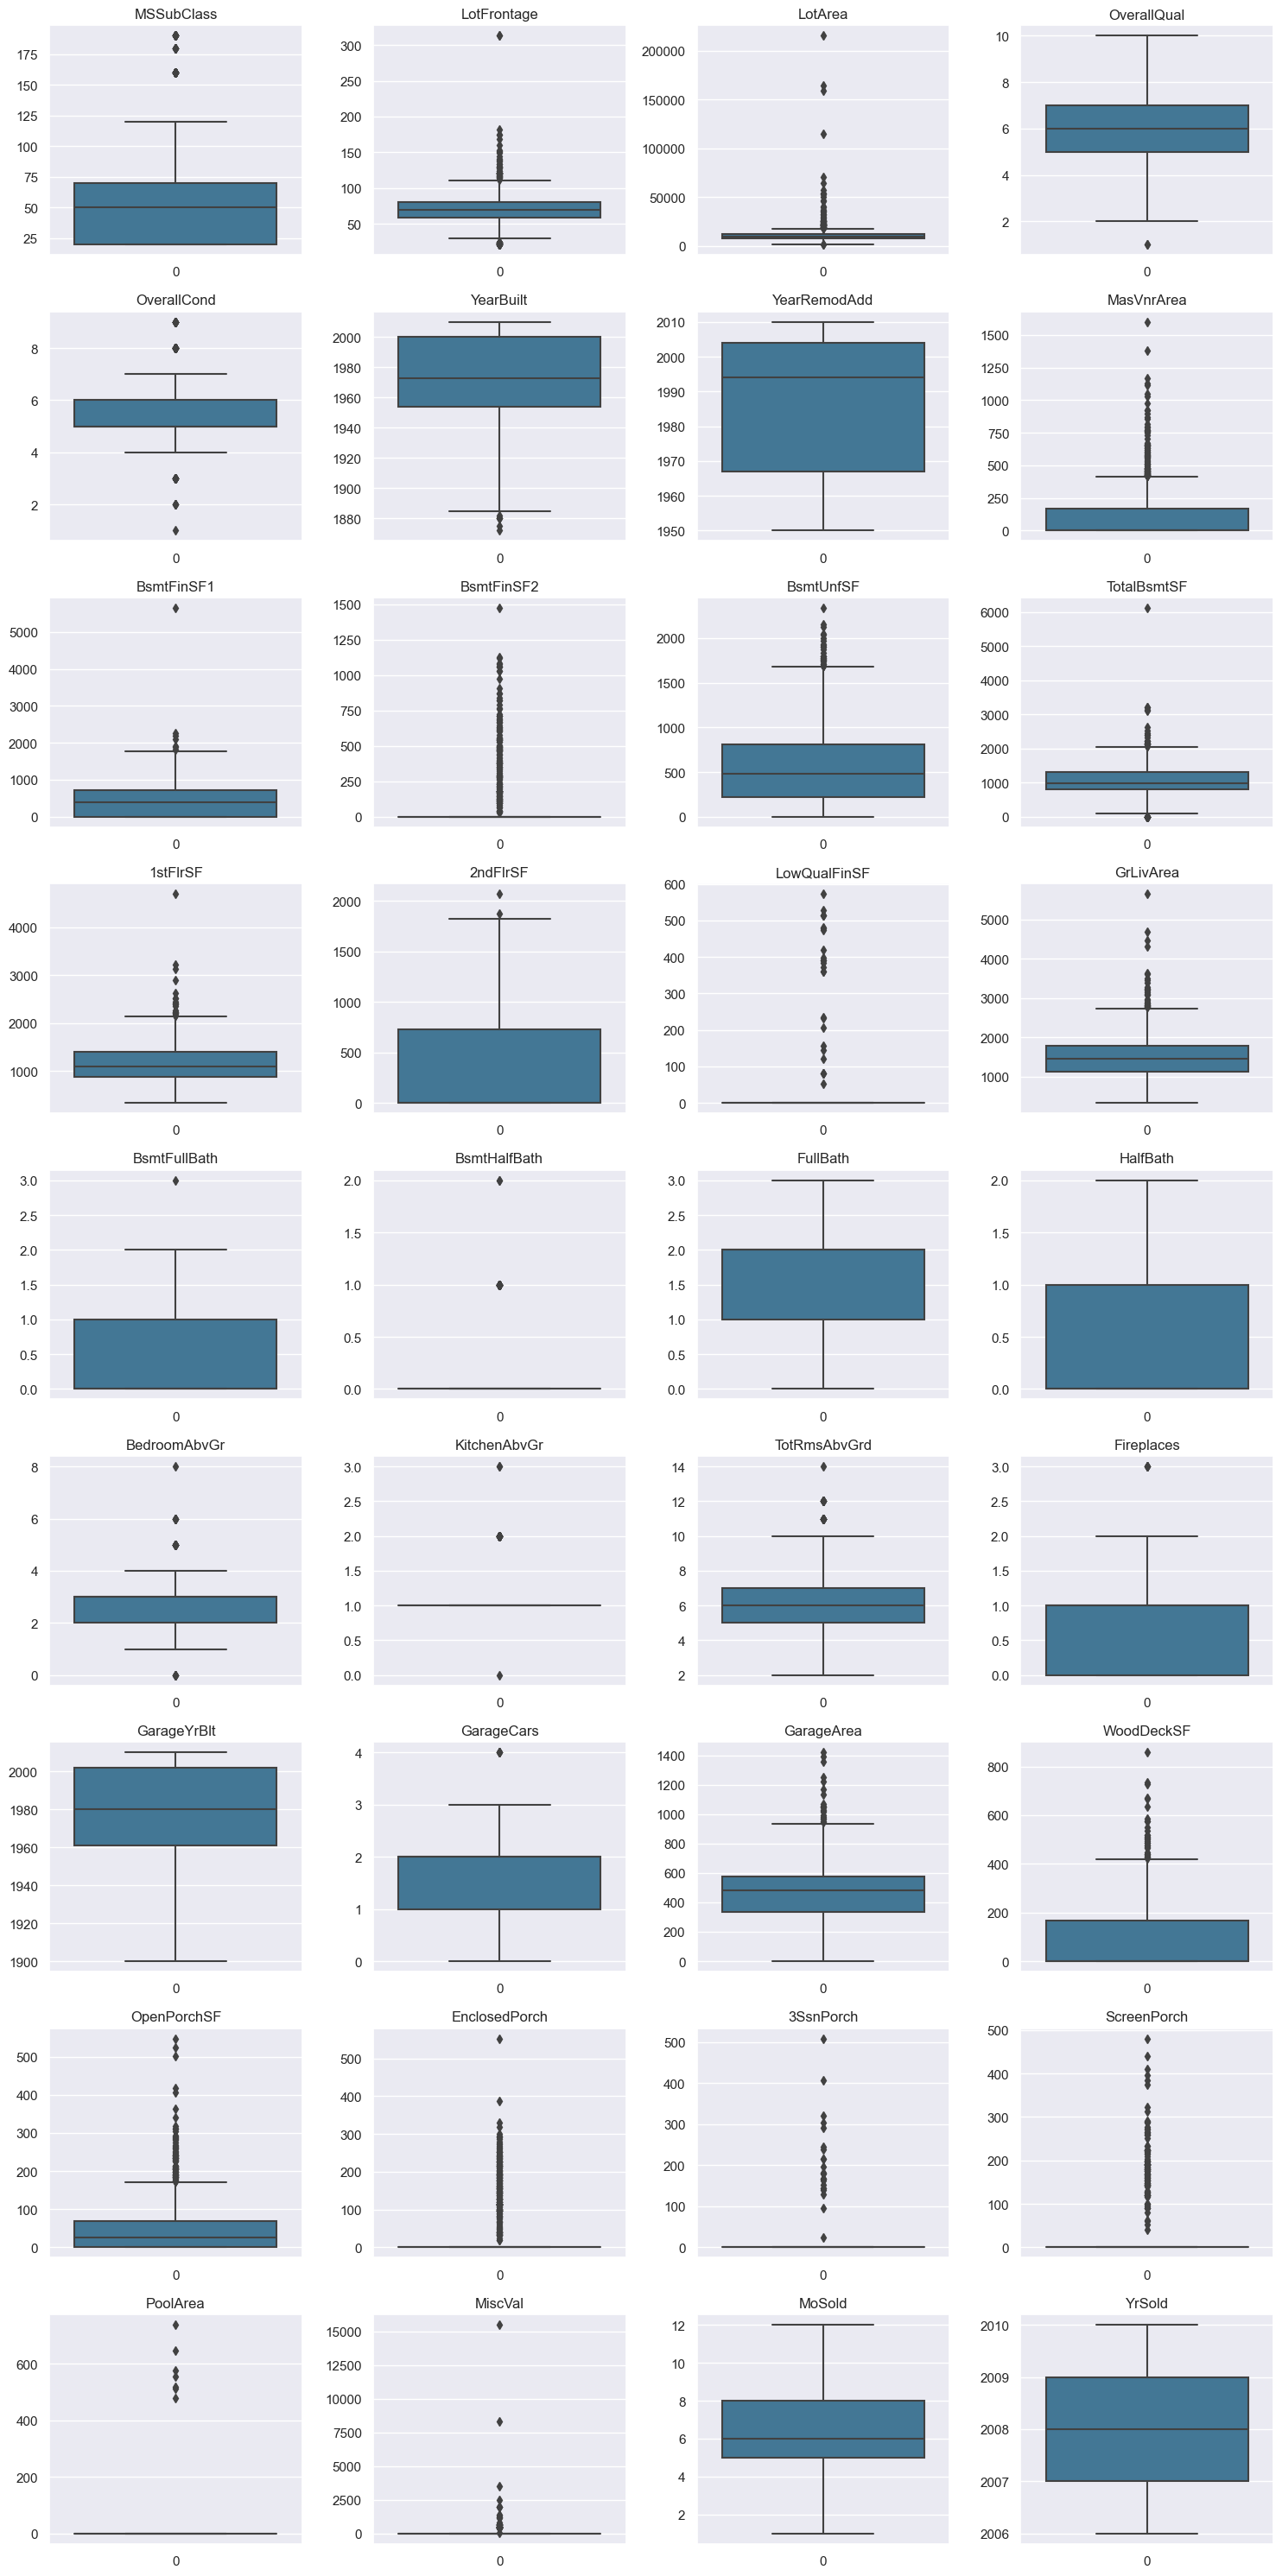

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find outliers for all numerical columns (before handling missing values)
numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id", "SalePrice"], axis=1)
num_plots = len(numerical_df.columns)

# Determine the number of rows and columns for subplots
num_rows = 9  # Number of rows for subplots
num_cols = 4  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the vertical and horizontal spacing between subplots

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_df.columns):
    ax = axes[i]
    sns.boxplot(numerical_df[column], orient='v', ax=ax,palette='mako')
    ax.set_title(column)  # Set the title of the subplot

# Hide unused subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap of subplots
plt.show()


#### Observation5: 

- From the above box plots we can most of the columns are having outliers and some columns are having high zero values such as `PoolArea`,`MiscVal`,`BsmtHalfBath` and so on.

- For checking if the outliers are valid or invalid we need to analyse each of the variable and accordingly decide to keep or remove the outliers.

Outliers:
11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64


<AxesSubplot: xlabel='SalePrice'>

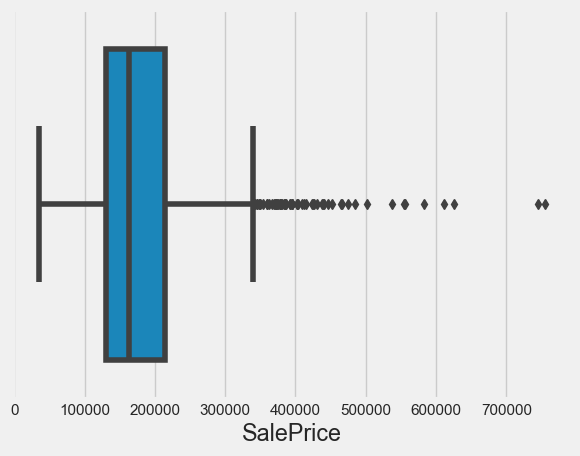

In [48]:
# Select the "SalePrice" column
sale_price = df_train["SalePrice"]

# Calculate the IQR
Q1 = sale_price.quantile(0.25)
Q3 = sale_price.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Find outliers
outliers = sale_price[(sale_price < lower_threshold) | (sale_price > upper_threshold)]

# Print the outliers
print("Outliers:")
print(outliers)

# Visualize the distribution with box plot
sns.boxplot(x=sale_price)


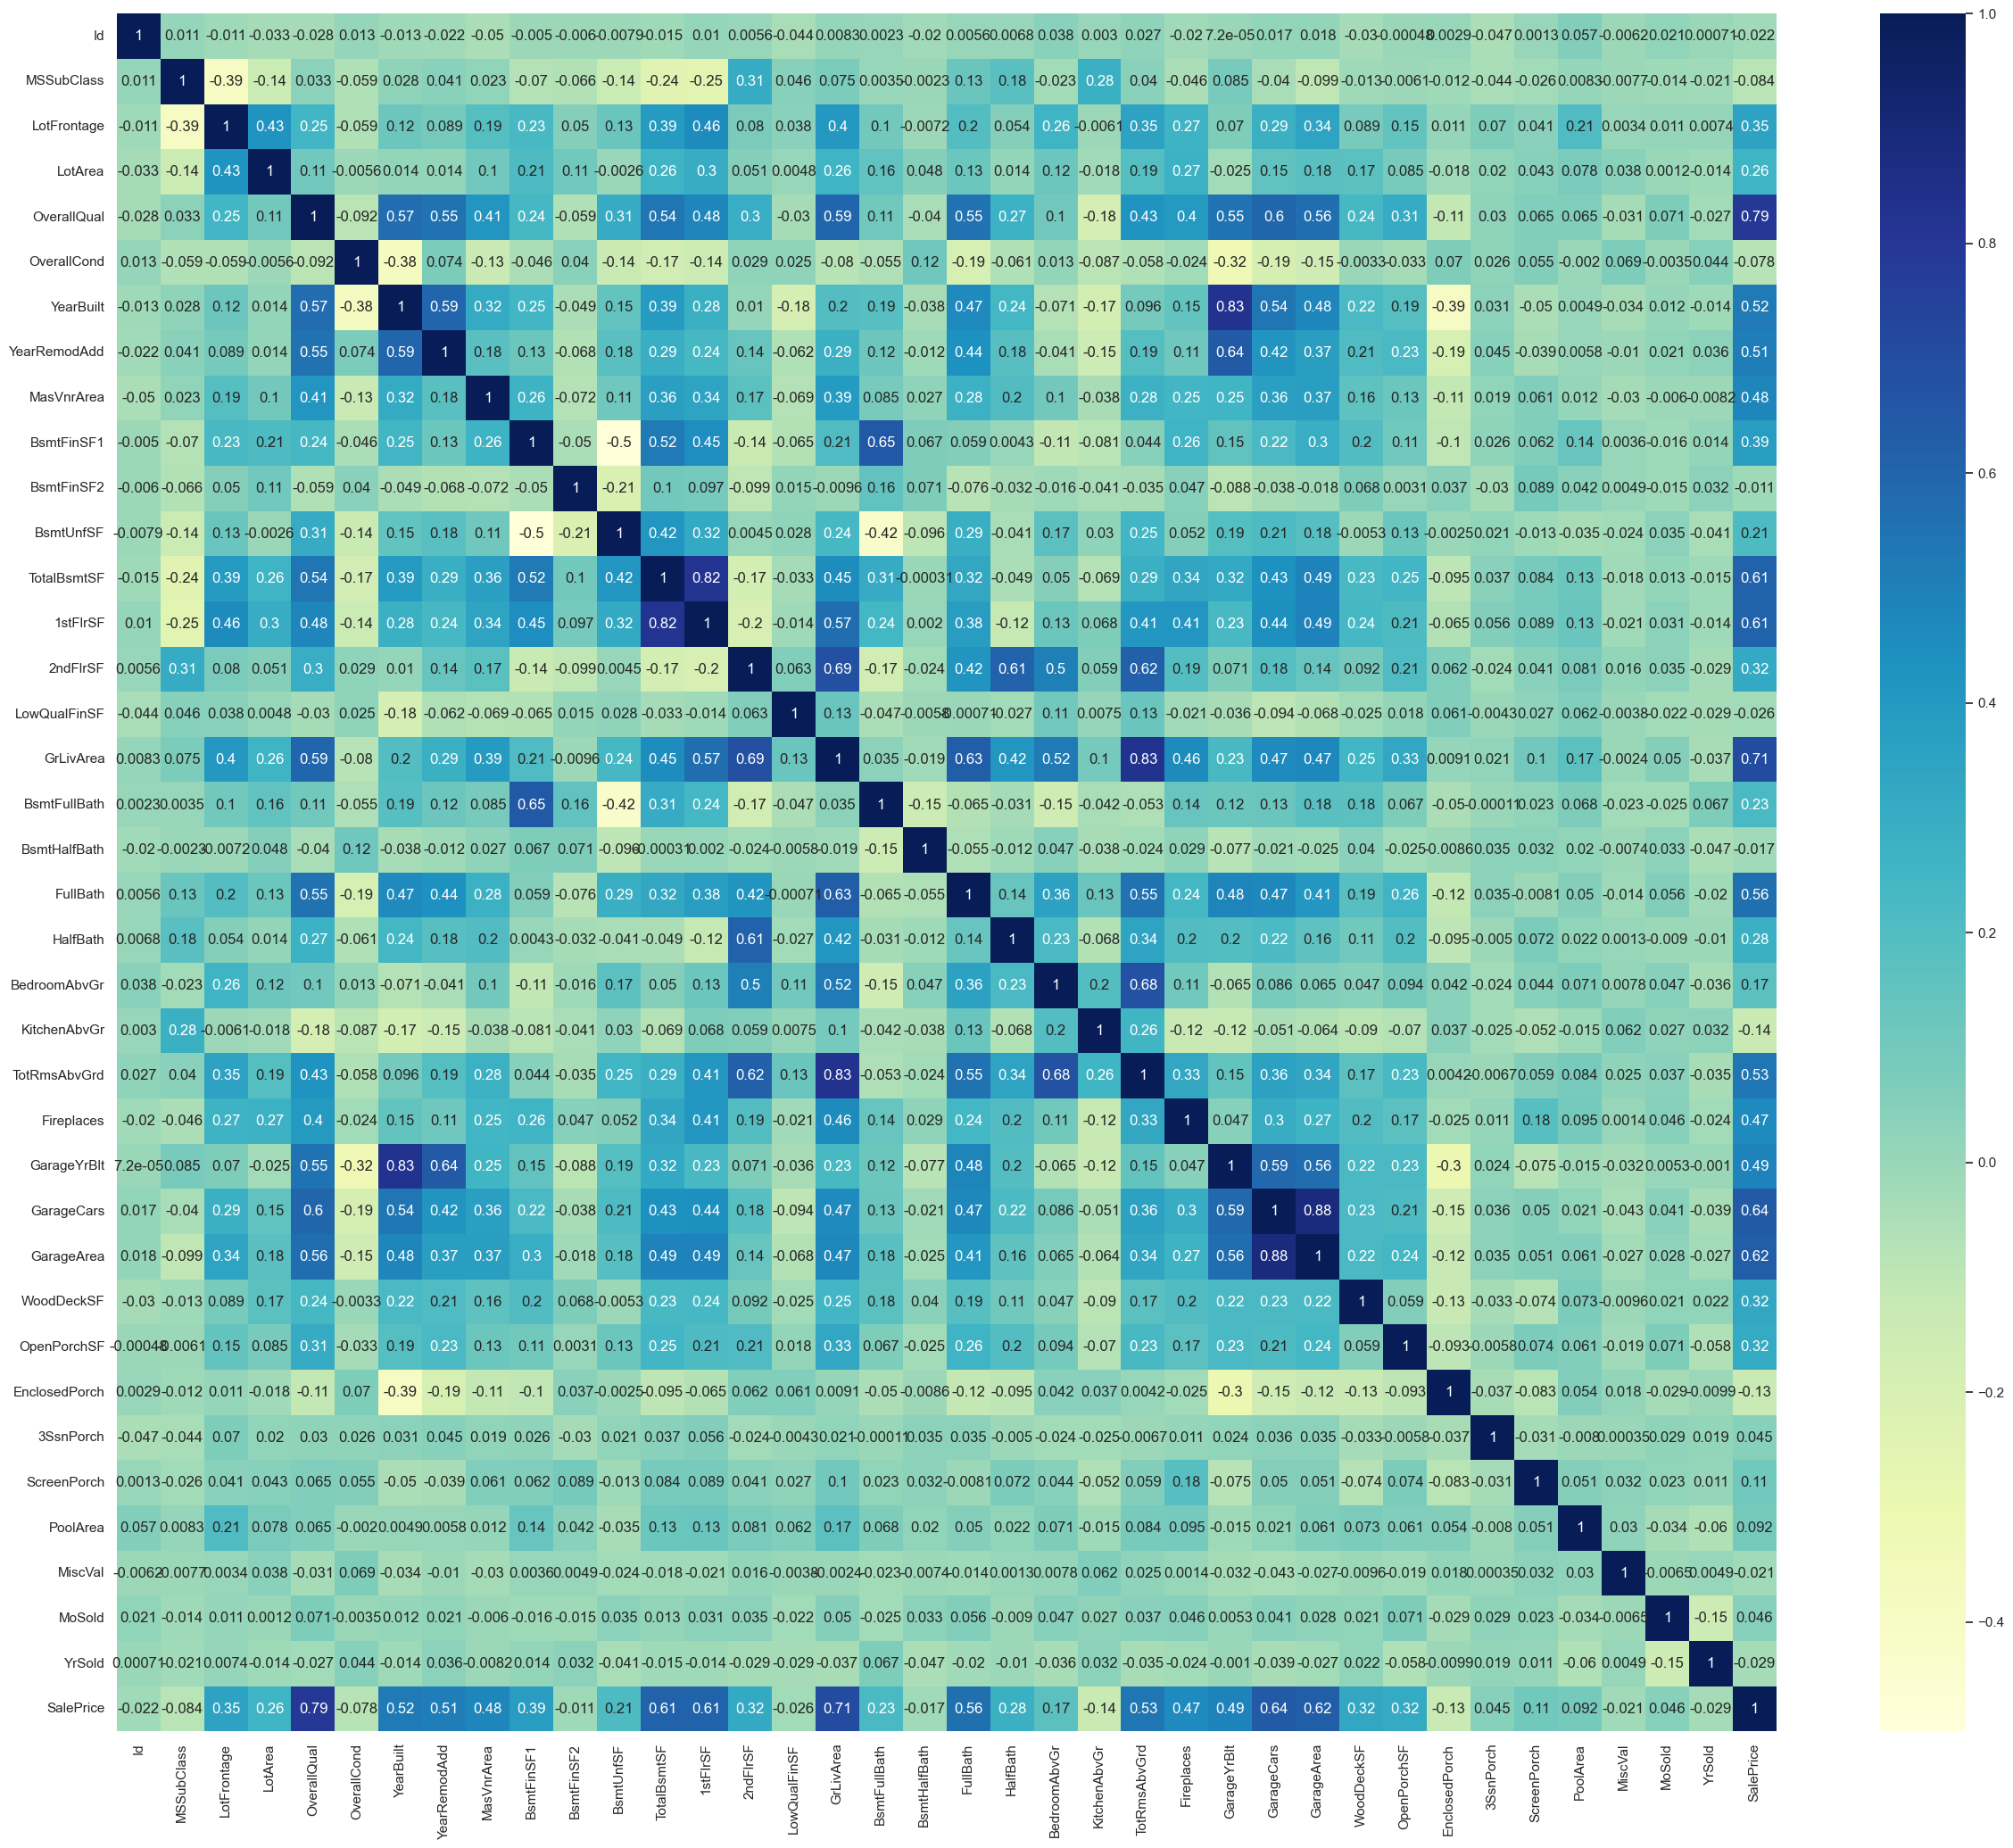

In [26]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Correlation with Numerical Features


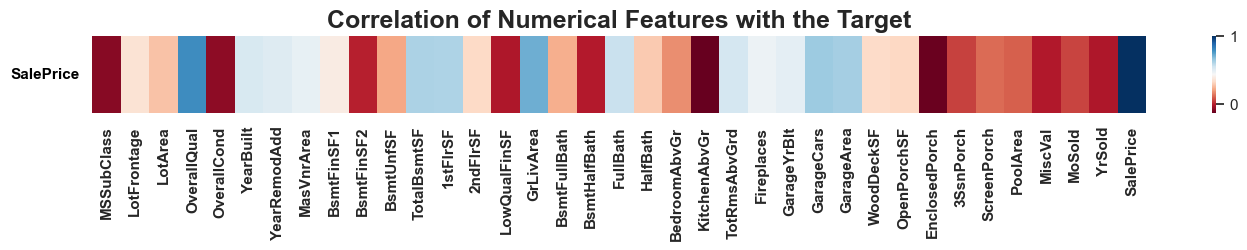

In [27]:
numerical_df = df_train.select_dtypes(exclude = 'object')
numerical_df = numerical_df.drop('Id', axis=1)

corr_num = numerical_df.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by='SalePrice', ascending=False).head(1), cmap='RdBu')

plt.title('Correlation of Numerical Features with the Target', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='black', rotation=0)



plt.show()

In [28]:
correlation = df_train.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

corr_house = correlation.style.background_gradient(cmap = cmap)

corr_house

#### Observation 6: 

- From the above table, we can conclude that __better the overall quality of the house, more will be the price of the house which is also true in real life and same is true for the living area i.e as the area increases, more will be the Sale Price.__

- __`OverallQual`,`GrLivArea`,`GarageCars`,`GarageArea` and `TotalBsmtSF` are the top 5 highly correlated features with the target variable of `SalePrice`__

### Section3:- 
**Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.**


** First I want to see the relationship between predictots such as ['YearBuilt', 'GrLivArea', 'TotalBsmtSF'] to dependent variable 'SalePrice'.**

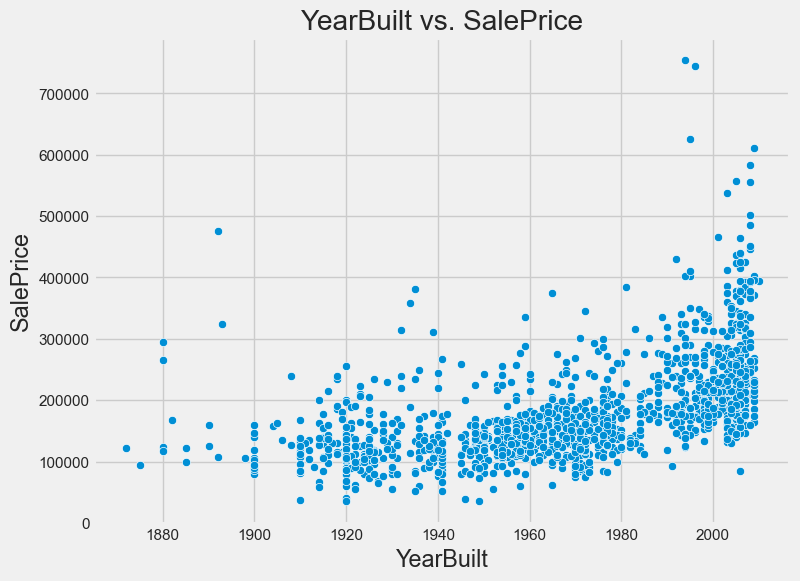

Correlation between YearBuilt and SalePrice: 0.52


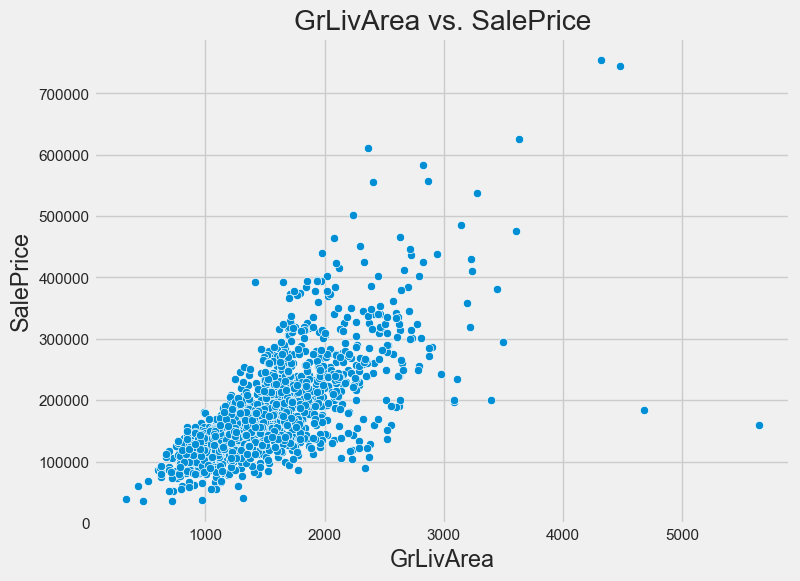

Correlation between GrLivArea and SalePrice: 0.71


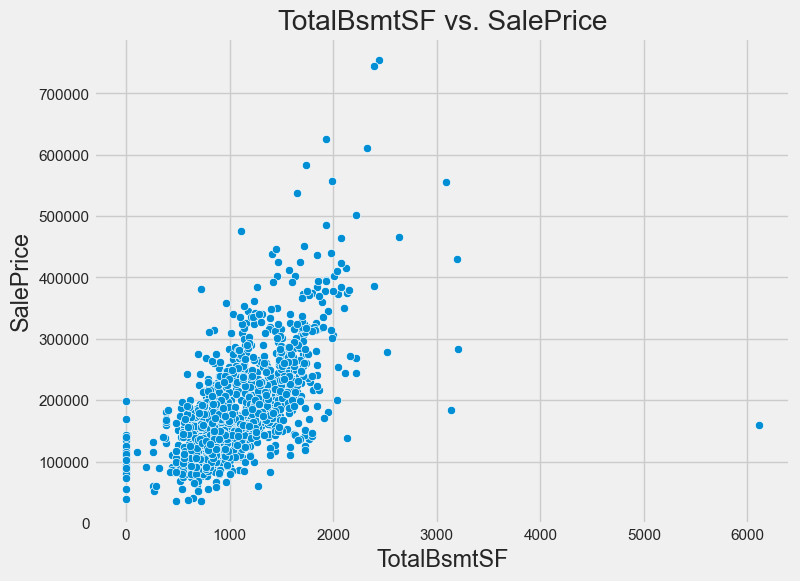

Correlation between TotalBsmtSF and SalePrice: 0.61


In [49]:
# Select three potential predictors
predictors = ['YearBuilt', 'GrLivArea', 'TotalBsmtSF']

# Scatter plots and correlations
for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_train, x=predictor, y='SalePrice')
    plt.title(f'{predictor} vs. SalePrice')
    plt.xlabel(predictor)
    plt.ylabel('SalePrice')
    plt.show()
    
    correlation = df_train[predictor].corr(df_train['SalePrice'])
    print(f"Correlation between {predictor} and SalePrice: {correlation:.2f}")

**Let's plot talong with regression line to have better visualization**

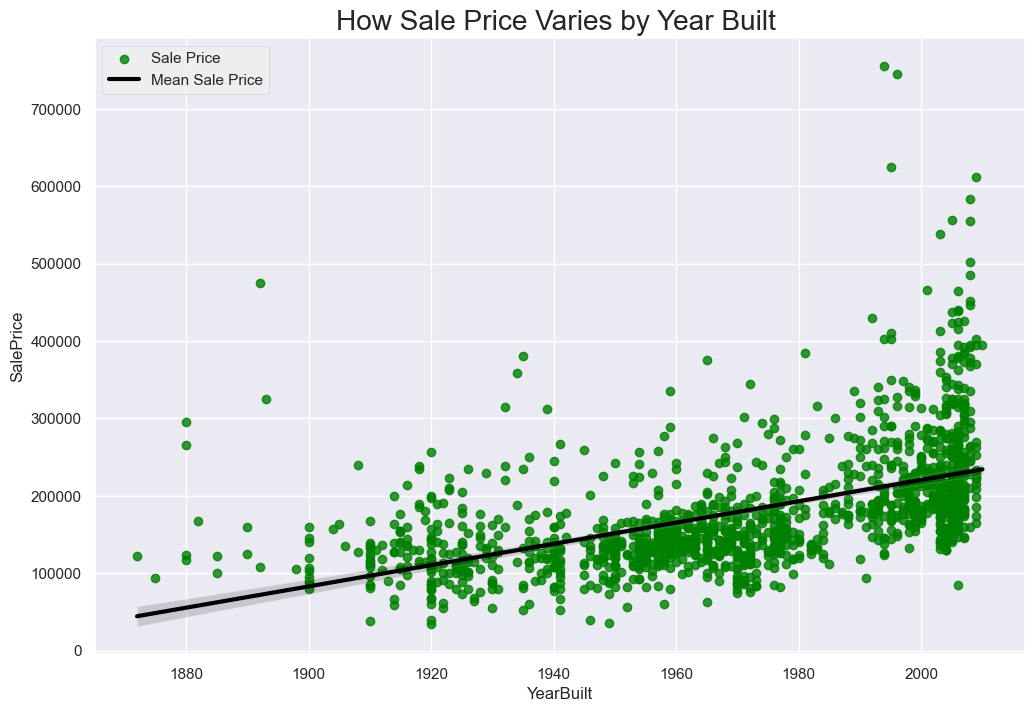

In [31]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=df_train, x='YearBuilt', y='SalePrice',scatter_kws={"color":"green"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by Year Built ")

# Add labels and title
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

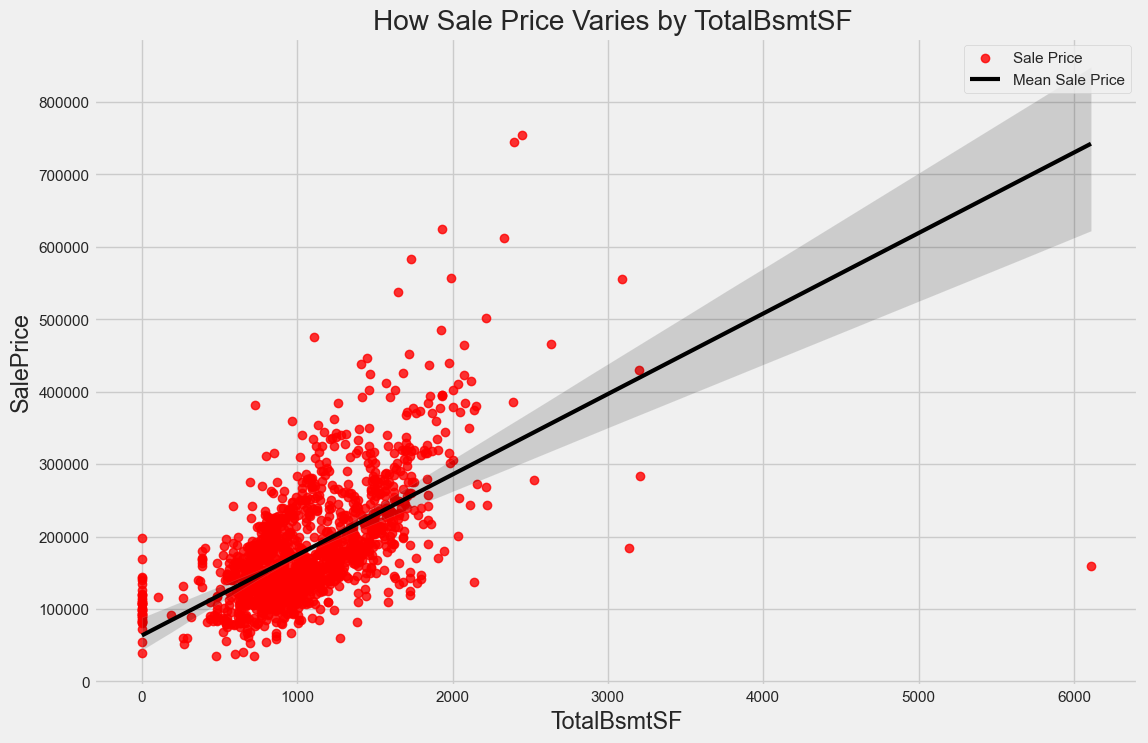

In [32]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=df_train, x='TotalBsmtSF', y='SalePrice',scatter_kws={"color":"red"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by TotalBsmtSF ")

# Add labels and title
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

### Findings:-
- Based on above plots(correlation chart Included)  and intuition applied on the data set ,Here are my three top predictors picks to proceed. 
- 1. OverallQual
- 2. GrLivArea
- 3. GarageCars

## Relation of SalePrice with Top 3 Highly Correlated Features

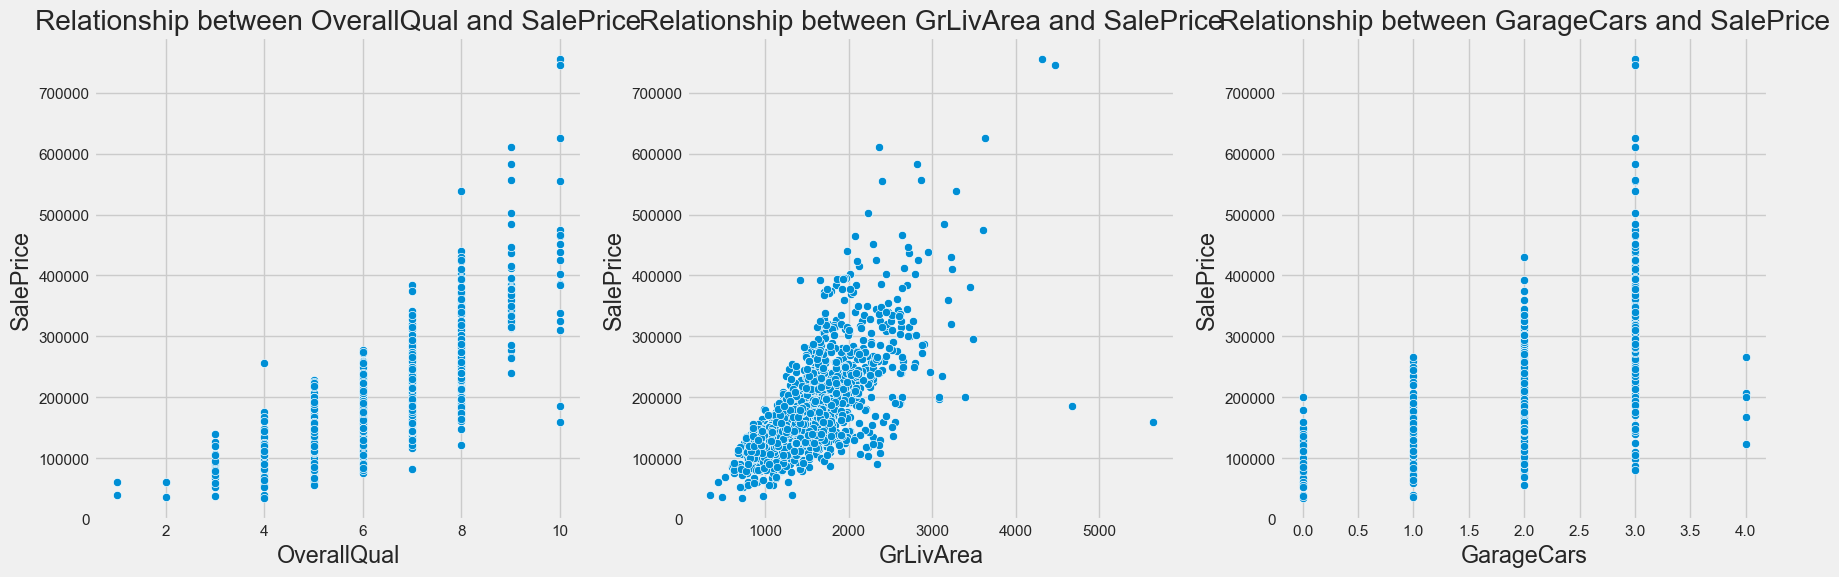

Correlation between OverallQual and SalePrice: 0.7909816005838052
Correlation between GrLivArea and SalePrice: 0.7086244776126522
Correlation between GarageCars and SalePrice: 0.6404091972583515


In [33]:


# Choose three potential predictors
predictor1 = "OverallQual"
predictor2 = "GrLivArea"
predictor3 = "GarageCars"

# Create scatter plots to visualize relationships
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=predictor1, y="SalePrice", data=df_train)
plt.title("Relationship between OverallQual and SalePrice")

plt.subplot(1, 3, 2)
sns.scatterplot(x=predictor2, y="SalePrice", data=df_train)
plt.title("Relationship between GrLivArea and SalePrice")

plt.subplot(1, 3, 3)
sns.scatterplot(x=predictor3, y="SalePrice", data=df_train)
plt.title("Relationship between GarageCars and SalePrice")

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
corr1 = df_train[predictor1].corr(df_train["SalePrice"])
corr2 = df_train[predictor2].corr(df_train["SalePrice"])
corr3 = df_train[predictor3].corr(df_train["SalePrice"])

print("Correlation between", predictor1, "and SalePrice:", corr1)
print("Correlation between", predictor2, "and SalePrice:", corr2)
print("Correlation between", predictor3, "and SalePrice:", corr3)


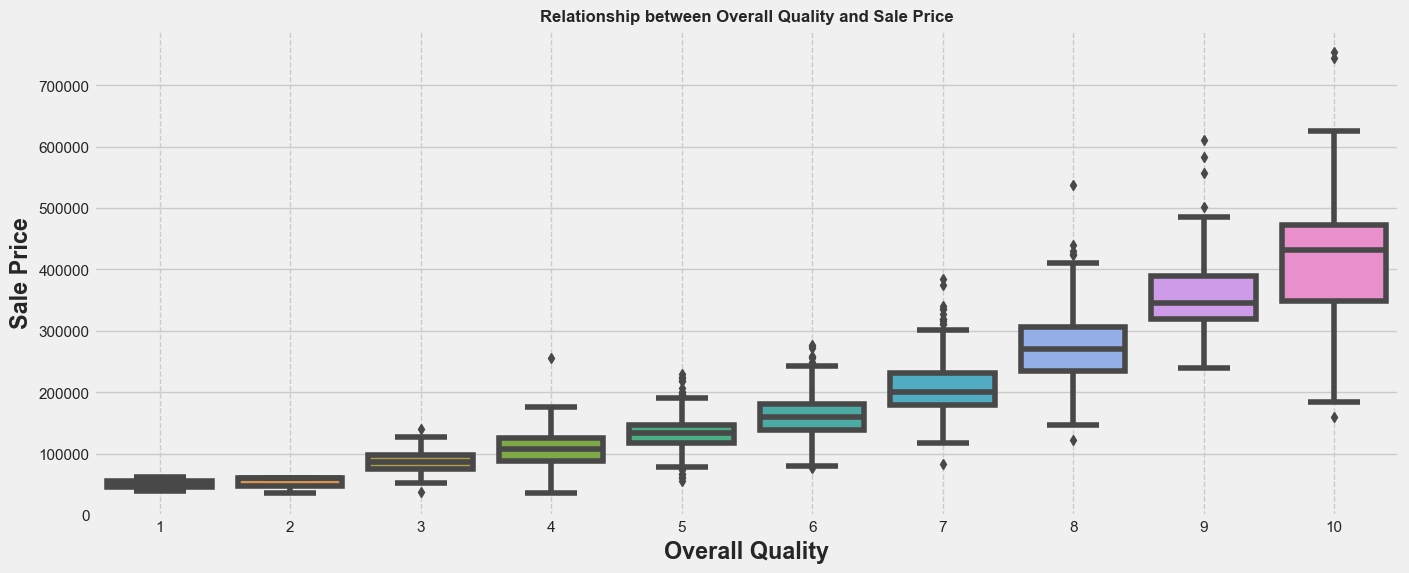

In [34]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice')
plt.title('Relationship between Overall Quality and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xlabel('Overall Quality', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Observations: 

- From the above boxplot we can observe an increasing trend in the Sale Prices as __Overall Quality increases Sale Price of the houses are also increasing.__

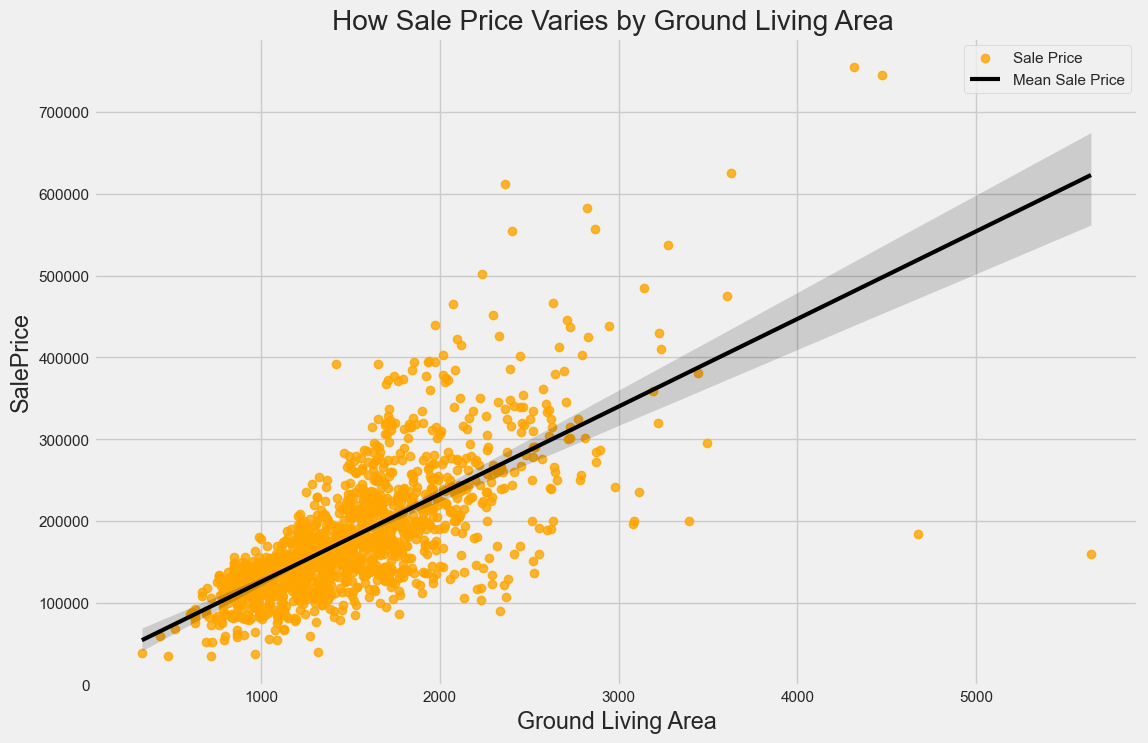

In [35]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice',
            scatter_kws={"color":"orange"},
            line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},
            label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by Ground Living Area ")

# Add labels and title
plt.xlabel('Ground Living Area')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

#### Observations: 

- We can observe that there is almost **a linear relationship between Living Area and the Sale Price**. If the area of Ground Living area  is huge then the Sale-Price seems to be  high as well  with an exception of   two rightmost points . **These two points can be potential  outliers** and We need to investigate and  can  drop both of them below.

In [36]:
house_train = df_train[df_train['GrLivArea'] < 4500]
house_train.reset_index(inplace=True,drop=True)

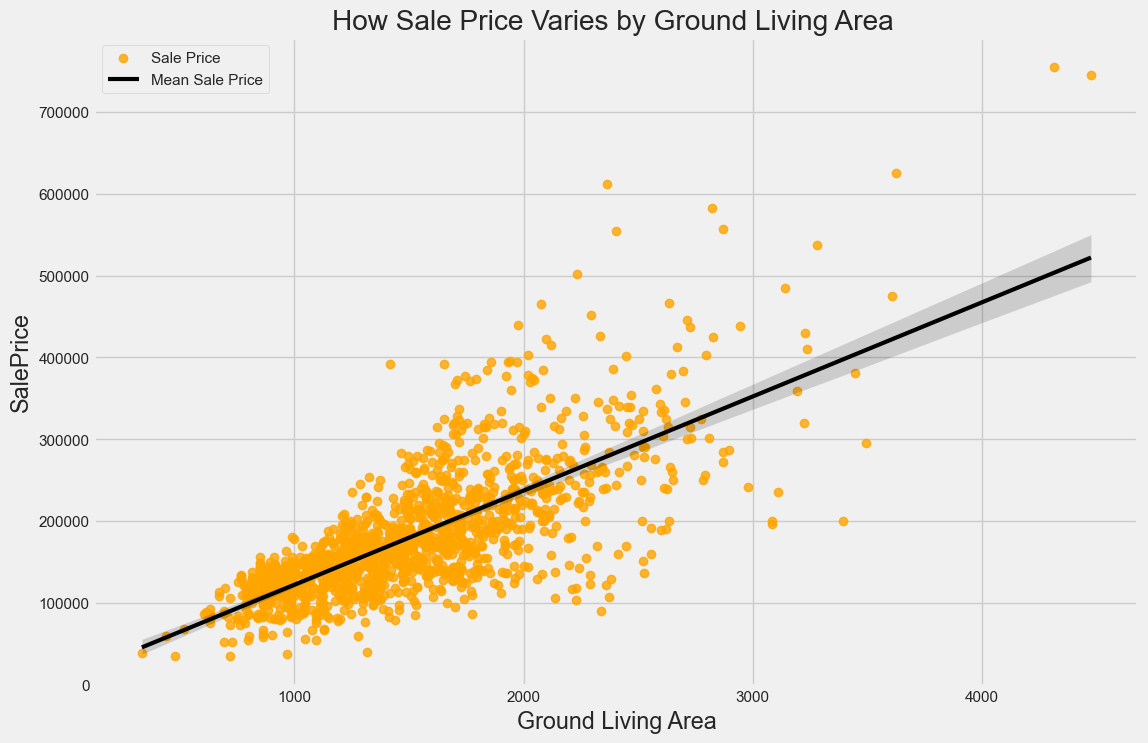

In [37]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=house_train, x='GrLivArea', y='SalePrice',
            scatter_kws={"color":"orange"},
            line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},
            label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by Ground Living Area ")

# Add labels and title
plt.xlabel('Ground Living Area')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

Now after treating those potential outliers from the column , we can observe that those two values have been successfully dropped and trend seems to follow as we have outlined in above observation meaning increase of Ground Living area result in an increase of the Sale-Price as well.

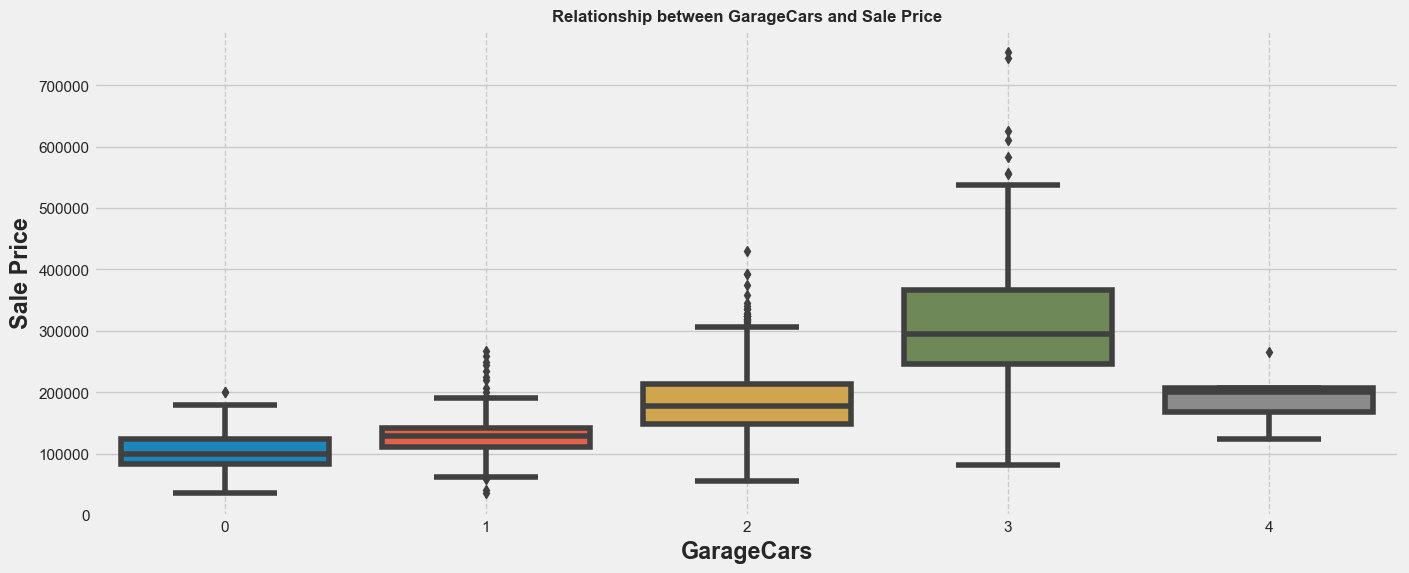

In [38]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=df_train, x='GarageCars', y='SalePrice')
plt.title('Relationship between GarageCars and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xlabel('GarageCars', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Observations: 

- From the above boxplot we can observe an increasing trend in the Sale Prices as __the value of GarageCars increases Sale Price of the houses are also increasing with an exception in the last when this value becomes '4' and  those  points can be treated as potential outliers and can drop as well with a proper care.__

### Section4:- 
**Engage in feature creation by splitting, merging, or otherwise generating a new predictor.**

**Approach Outlined:-**
- We first think of few potential feature than seems pretty intuitive like:-
- HouseAge calculated from 'YearBuilt' and substracting 2from  the current year 
- TotalBath is created as one feature by merging  FullBath and HalfBath.
- TotalSF is created based on feature interactions like 1stFlrSF and 2ndFlrSF

In [36]:
# make a copy of existing dataset and include the new feature into that.
house_train=df_train
# Current year 
current_year = datetime.datetime.now().year

# Subtract 'YearBuilt' from the current year to calculate 'House Age'
house_train['HouseAge'] = current_year - house_train['YearBuilt']



# Merging features to create a new predictor 'TotalBath'
house_train["TotalBath"] = house_train["FullBath"] + 0.5 * house_train["HalfBath"]


# Generating a new predictor based on feature interactions
house_train["TotalSF"] = house_train["1stFlrSF"] + house_train["2ndFlrSF"]

# Verify the new predictors
print(house_train[["HouseAge", "TotalBath", "TotalSF"]].head())


   HouseAge  TotalBath  TotalSF
0        20        2.5     1710
1        47        2.0     1262
2        22        2.5     1786
3       108        1.0     1717
4        23        2.5     2198


**Now Let's visualize their impact on our dependent variable , if it brings or add any values on preduction (our prime objective).**

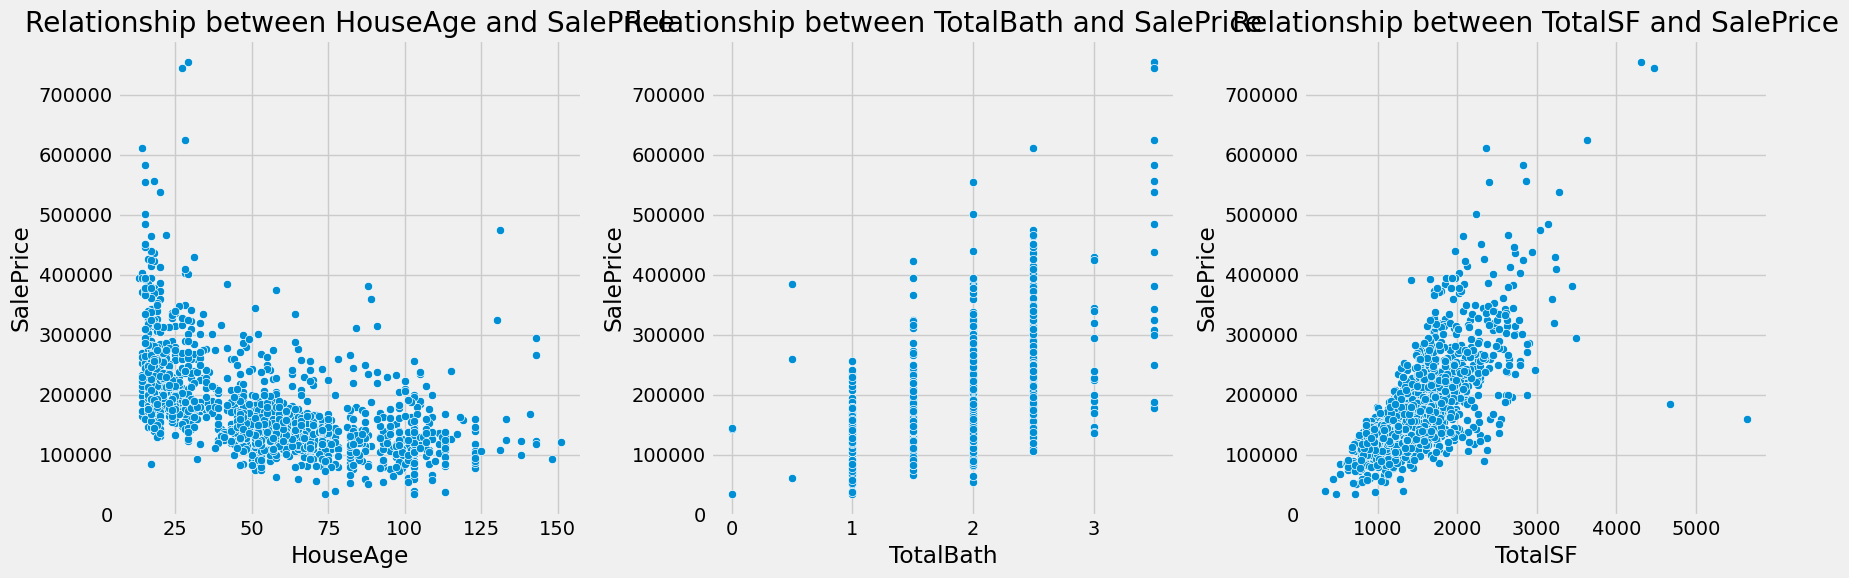

Correlation between HouseAge and SalePrice: -0.5228973328794971
Correlation between TotalBath and SalePrice: 0.597965621006429
Correlation between TotalSF and SalePrice: 0.7168830793692805


In [37]:


# Choose three potential predictors
predictor1 = "HouseAge"
predictor2 = "TotalBath"
predictor3 = "TotalSF"

# Create scatter plots to visualize relationships
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=predictor1, y="SalePrice", data=house_train)
plt.title("Relationship between HouseAge and SalePrice")

plt.subplot(1, 3, 2)
sns.scatterplot(x=predictor2, y="SalePrice", data=house_train)
plt.title("Relationship between TotalBath and SalePrice")

plt.subplot(1, 3, 3)
sns.scatterplot(x=predictor3, y="SalePrice", data=house_train)
plt.title("Relationship between TotalSF and SalePrice")

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
corr1 = house_train[predictor1].corr(house_train["SalePrice"])
corr2 = house_train[predictor2].corr(house_train["SalePrice"])
corr3 = house_train[predictor3].corr(house_train["SalePrice"])

print("Correlation between", predictor1, "and SalePrice:", corr1)
print("Correlation between", predictor2, "and SalePrice:", corr2)
print("Correlation between", predictor3, "and SalePrice:", corr3)

#### Observations: 

- Considering above plot and correlation values ,it seems TotalSF  can be a potential predictor as well and can be added into out list. .

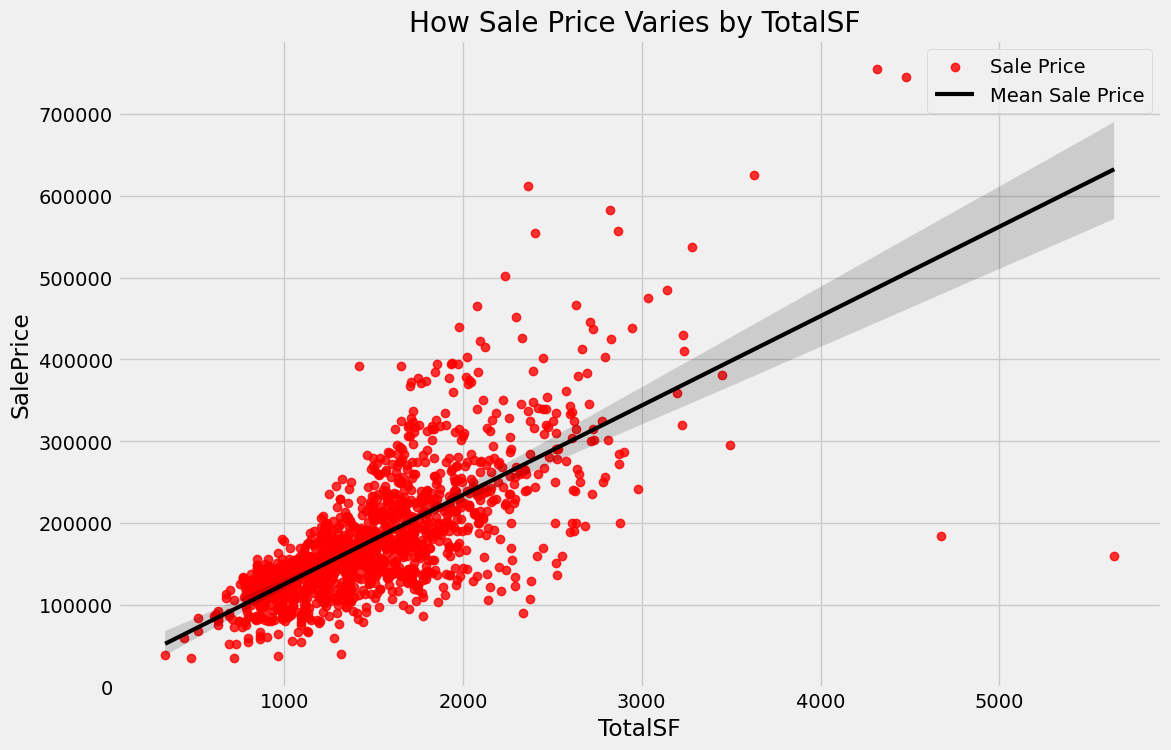

In [45]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=house_train, x='TotalSF', y='SalePrice',scatter_kws={"color":"red"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by TotalSF ")

# Add labels and title
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

### New Feature creation   after merging  GrLivArea and TotalBsmtSF

In [46]:

house_train['TotalLivingArea'] = house_train['GrLivArea'] + house_train['TotalBsmtSF']


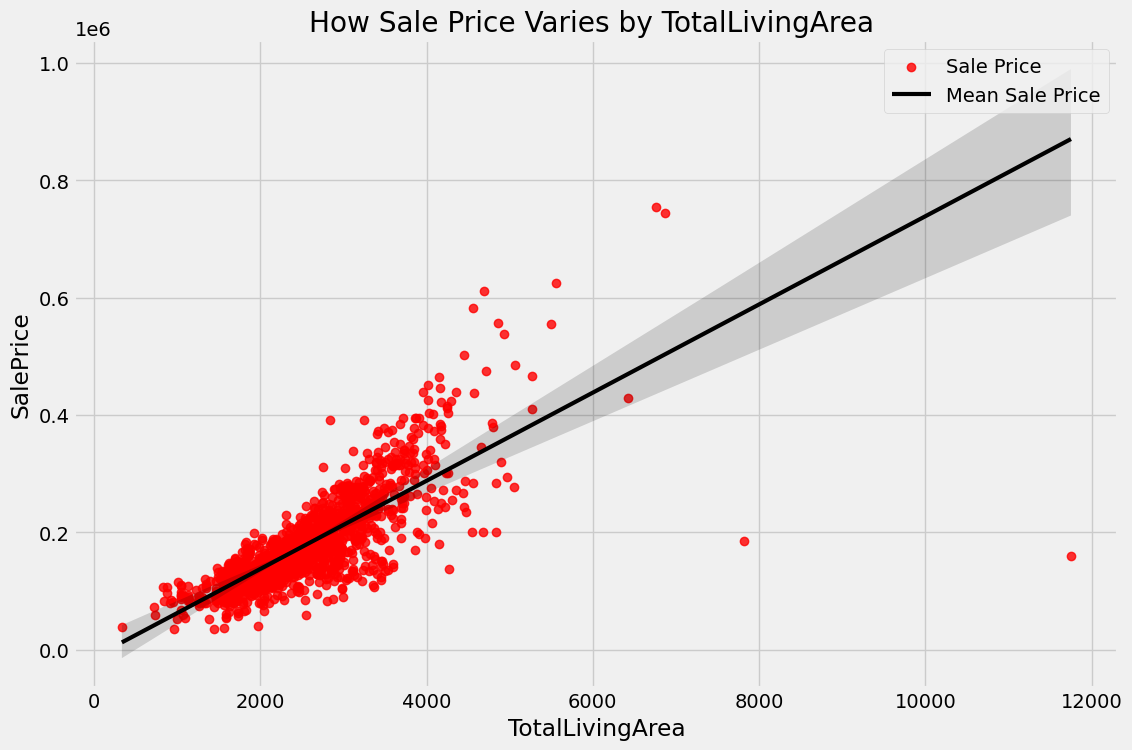

In [47]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=df_train, x='TotalLivingArea', y='SalePrice',scatter_kws={"color":"red"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by TotalLivingArea ")

# Add labels and title
plt.xlabel('TotalLivingArea')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

In [48]:
# Calculate correlation coefficients
corr = house_train["TotalLivingArea"].corr(house_train["SalePrice"])
print("Correlation between", " TotalLivingArea and SalePrice:", corr)

Correlation between  TotalLivingArea and SalePrice: 0.7789588289942262


**Explanation and Observation**:-
The correlation between TotalLivingArea and SalePrice is 0.78 (0.7789588289942262).

- A correlation value ranges from -1 to 1, where a value close to 1 indicates a strong positive correlation. In this case, the correlation coefficient of **0.78** suggests a **strong positive relationship between TotalLivingArea and SalePrice**.

- It means that as the TotalLivingArea of a house increases, the SalePrice tends to increase as well. In other words, there is a tendency for larger living areas to be associated with higher sale prices. This positive correlation indicates that TotalLivingArea is a potentially influential predictor of SalePrice in the house price dataset.


### Let's add these two new features  TotalSF and TotalLivingArea into list of our potential  predictors along with .

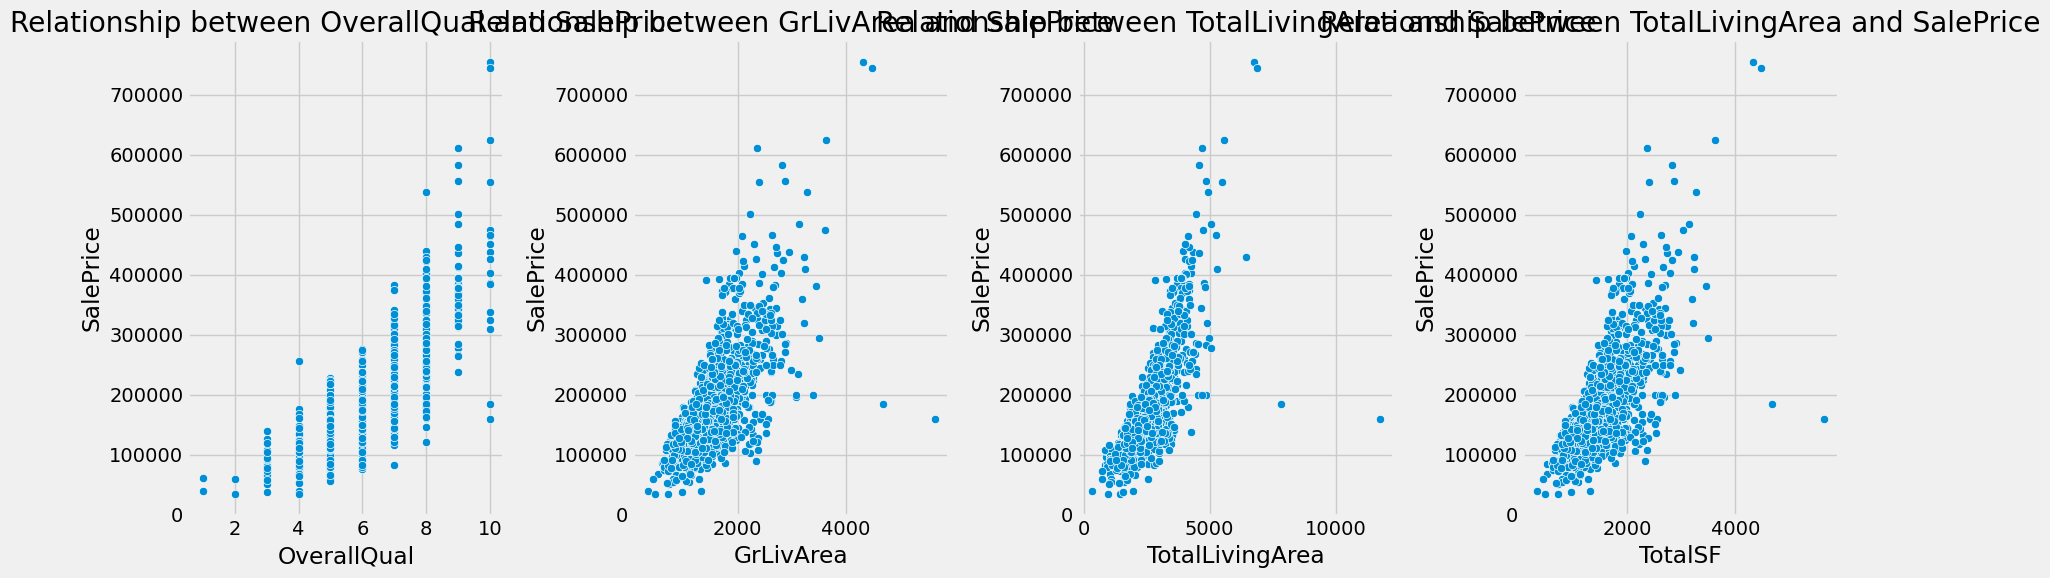

Correlation between OverallQual and SalePrice: 0.7909816005838052
Correlation between GrLivArea and SalePrice: 0.7086244776126522
Correlation between TotalLivingArea and SalePrice: 0.7789588289942262
Correlation between TotalSF and SalePrice: 0.7168830793692805


In [49]:
# Choose three potential predictors
predictor1 = "OverallQual"
predictor2 = "GrLivArea"
predictor3 = "TotalLivingArea"
predictor4 = "TotalSF"

# Create scatter plots to visualize relationships
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
sns.scatterplot(x=predictor1, y="SalePrice", data=house_train)
plt.title("Relationship between OverallQual and SalePrice")

plt.subplot(1, 4, 2)
sns.scatterplot(x=predictor2, y="SalePrice", data=house_train)
plt.title("Relationship between GrLivArea and SalePrice")

plt.subplot(1, 4, 3)
sns.scatterplot(x=predictor3, y="SalePrice", data=house_train)
plt.title("Relationship between TotalLivingArea and SalePrice")

plt.subplot(1, 4, 4)
sns.scatterplot(x=predictor4, y="SalePrice", data=house_train)
plt.title("Relationship between TotalLivingArea and SalePrice")

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
corr1 = house_train[predictor1].corr(house_train["SalePrice"])
corr2 = house_train[predictor2].corr(house_train["SalePrice"])
corr3 = house_train[predictor3].corr(house_train["SalePrice"])
corr4 = house_train[predictor4].corr(house_train["SalePrice"])

print("Correlation between", predictor1, "and SalePrice:", corr1)
print("Correlation between", predictor2, "and SalePrice:", corr2)
print("Correlation between", predictor3, "and SalePrice:", corr3)
print("Correlation between", predictor4, "and SalePrice:", corr4)

**Brief Summary & Observation:-**
As we discussed above that the correlation coefficients indicate the strength and direction of the linear relationship between each feature and the SalePrice(our dependent variable). 
- Here is a summary of the correlations:

- OverallQual and SalePrice: The correlation coefficient is 0.7909816005838052 close to 0.79. This suggests a strong positive relationship between the overall quality of a house and its sale price. Higher values of OverallQual are associated with higher sale prices.

- GrLivArea and SalePrice: The correlation coefficient is 0.7086244776126522 close to 0.71. This indicates a moderate positive correlation between the above ground living area (in square feet) and the sale price. Generally, larger living areas tend to have higher sale prices.

- TotalLivingArea (created after merging two existing features)  and SalePrice: The correlation coefficient is 0.7789588289942262 , close to 0.78. This shows a strong positive correlation between the total living area (including basement and above ground living area) and the sale price. Houses with larger total living areas are likely to have higher sale prices.

- TotalSF (a new feature created after merging existing ones)  and SalePrice: The correlation coefficient is 0.7168830793692805. This implies a moderate positive correlation between the total square footage of the house (including basement, 1st floor, and 2nd floor) and the sale price. Houses with larger total square footage tend to have higher sale prices.

**In summary, all of these features (OverallQual, GrLivArea, TotalLivingArea, and TotalSF) show positive correlations with the SalePrice. This suggests that they could be influential predictors in estimating the sale price of a house.**

### Section5:- 
**Using the dependent variable, perform both min-max and standard scaling in Python.**


**Min-Max Scaling**

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

y = house_train['SalePrice'].values.reshape(-1, 1)  # Reshape the dependent variable to a 2D array

# Perform min-max scaling
min_max_scaler = MinMaxScaler()
y_minmax = min_max_scaler.fit_transform(y)
y_minmax = pd.DataFrame(y_minmax,columns=['Minmax_SalePrice'])
y_minmax.head()

Minmax_SalePrice
0          0.241078
1          0.203583
2          0.261908
3          0.145952
4          0.298709

**Standard Scaling**

In [43]:
# Perform standard scaling
standard_scaler = StandardScaler()
y_standard = standard_scaler.fit_transform(y)
y_standard = pd.DataFrame(y_standard,columns=['Standard_SalePrice'])
y_standard.head()

Standard_SalePrice
0            0.346896
1            0.007136
2            0.535652
3           -0.515088
4            0.869120

**Log Transformation**

In [44]:
# Perform log scaling
y_log = np.log1p(house_train["SalePrice"])
y_log["Log_SalePrice"] = pd.DataFrame(y_log)
y_log["Log_SalePrice"].rename(columns = {"SalePrice":"Log_SalePrice"}).head(5)

Log_SalePrice
0      12.247699
1      12.109016
2      12.317171
3      11.849405
4      12.429220

###  Comparison of Scaling and Log Transformation with Original Sale Price

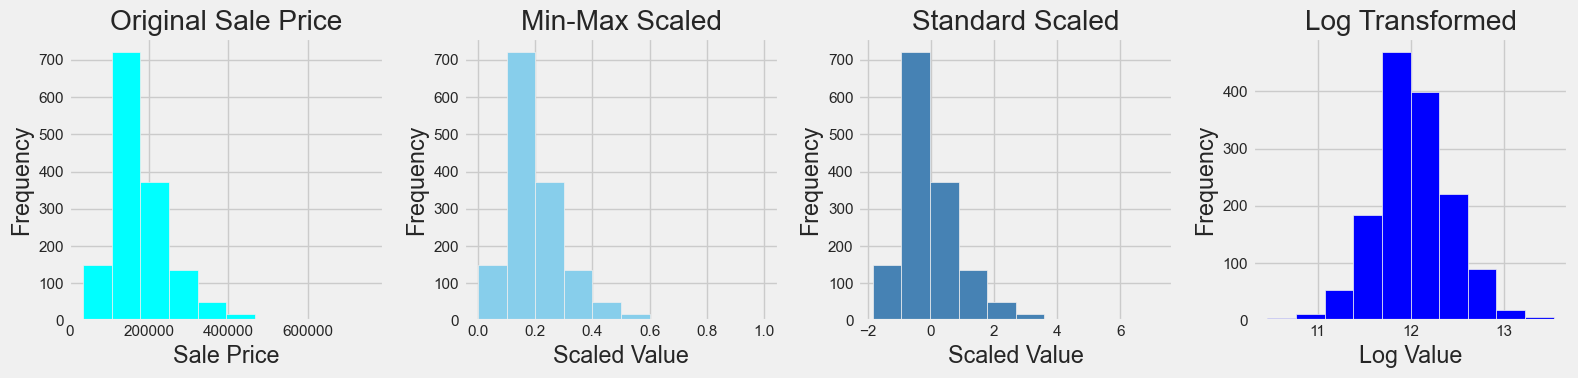

In [45]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot the original sale price column
axes[0].hist(house_train['SalePrice'], bins=10, color = 'cyan')
axes[0].set_title("Original Sale Price")
axes[0].set_xlabel("Sale Price")
axes[0].set_ylabel("Frequency")

# Plot the min-max scaled column
axes[1].hist(y_minmax, bins=10, color = 'skyblue')
axes[1].set_title("Min-Max Scaled")
axes[1].set_xlabel("Scaled Value")
axes[1].set_ylabel("Frequency")

# Plot the standard scaled column
axes[2].hist(y_standard, bins=10, color = 'steelblue')
axes[2].set_title("Standard Scaled")
axes[2].set_xlabel("Scaled Value")
axes[2].set_ylabel("Frequency")

# Plot the log transformed column
axes[3].hist(y_log["Log_SalePrice"], bins=10, color = 'blue')
axes[3].set_title("Log Transformed")
axes[3].set_xlabel("Log Value")
axes[3].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show();

In [54]:
# Convert the scaled arrays back to a DataFrame
df_minmax = pd.DataFrame(y_minmax, columns=['SalePrice_MinMax'])
df_standard = pd.DataFrame(y_standard, columns=['SalePrice_Standard'])

# Save the scaled DataFrames to files
df_minmax.to_csv('saleprice_minmax.csv', index=False)
df_standard.to_csv('saleprice_standard.csv', index=False)

### Final Takeaway:-

- **The dataset used for analysis is of Ames, Iowa with a dataset of 79 explanatory variables describing (almost) every aspect of residential homes in Ames.**

- **The "SalePrice" variable is right-skewed, indicating asymmetry, with a majority of houses sold at prices lower than the average.**

- **From the analysis Top 3 potentially High Influencing Predictors of Sale Price are OverallQual, GrLivArea and GarageCars.I have also analyzed TotalBsmtSF and YearBuilt against our target 'Sale Price  and we observed a moderate relationship only**

- **New Features like 'House Age' TotalBath , 'TotalSF' and 'TotalLivingArea'  are created either by some calculation or via merging from existing features .They are  showing some significant  correlation with the Sale Price.**

- **Log transformation of the "SalePrice" feature shows a histogram resembling a bell-shaped normal distribution, indicating a successful transformation to achieve normality.**